In [1]:
!pwd

/home/giakhang/dev/SCFlow


In [1]:
from mmengine import Config
from registry import MODELS, DATASETS
import torch
from mmengine.runner import load_checkpoint
from mmengine.runner import Runner 
import matplotlib.pyplot as plt

import trimesh
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import json
from tools.visualize import draw_detections

In [2]:
cfg_path = "/home/giakhang/dev/SCFlow/configs/refine_models/scflow_lumi_piano_real_mix_syn.py"
cfg = Config.fromfile(cfg_path)

model = MODELS.build(cfg.model)
cfg.load_from = "/home/giakhang/dev/SCFlow/work_dirs/scflow_lumi_piano_real_mix_syn_2025_03_26/iter_20000.pth"

In [3]:
model = model.to("cuda")
load_checkpoint(model, cfg.load_from, map_location='cuda')  # Use 'cuda' if needed
model.eval()

Loads checkpoint by local backend from path: /home/giakhang/dev/SCFlow/work_dirs/scflow_lumi_piano_real_mix_syn_2025_03_26/iter_20000.pth


SCFlowRefiner(
  (data_preprocessor): BaseDataPreprocessor()
  (render_encoder): RAFTEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (in1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (relu): ReLU(inplace=True)
    (res_layer1): ResLayer(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (in1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (in2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (relu): ReLU(inplace=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (in1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (conv2): Conv2d(64, 64, ker

# Test train set

In [4]:
cfg.train_dataloader.batch_size = 1
dataloader = Runner.build_dataloader(cfg.train_dataloader)

100%|██████████| 1362/1362 [00:00<00:00, 7308.12it/s]


In [5]:
for idx, batch in enumerate(dataloader):
    break

03/26 14:29:37 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
03/26 14:29:37 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
03/26 14:29:37 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
03/26 14:29:37 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
03/26 14:29:37 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
03/26 14:29:37 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-i

In [6]:
pred = model.loss(batch)

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [9]:
loss, log_imgs, log_vars, seq_rotations, seq_translations = pred

In [7]:
pred_rots = pred['rotations'][0].data.cpu().numpy()
pred_trans = pred['translations'][0].data.cpu().numpy()
labels = pred['labels'][0].data.cpu().numpy()

In [8]:
obj_idx = 0

pred_rot = pred_rots[obj_idx]
pred_tran = pred_trans[obj_idx]
label = labels[obj_idx]

In [60]:
img_path = batch['img_metas'][0].data['img_path']
img_name = int(img_path.split("/")[-1].split(".")[0])

src_dir = "/".join(img_path.split("/")[:-2])
camera_info_path = Path(src_dir) / "scene_camera.json"

cad_path = f"/home/giakhang/dev/SCFlow/data/lumi_piano_dataset/models_1080_mm/LUMI.obj"

In [61]:
img = cv2.imread(str(img_path))[..., ::-1]
mesh = trimesh.load_mesh(cad_path)
mesh = mesh.sample(1024).astype(np.float32)

with open(camera_info_path) as f:
    camera_info = json.load(f)

K = np.array(camera_info[str(img_name)]["cam_K"]).reshape(3, 3)

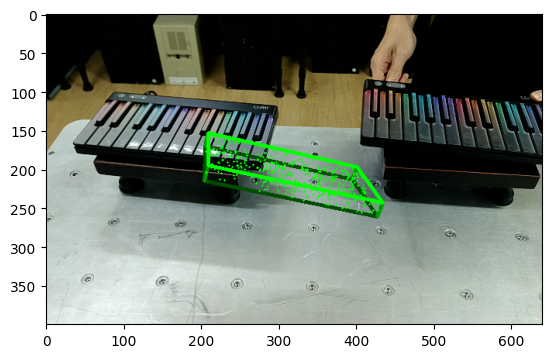

In [62]:
vis_img = draw_detections(img, pred_rot[None, ...], pred_tran[None, ...], mesh, K[None, ...], color=(0, 255, 0))
plt.imshow(vis_img)

# Train set

In [4]:
cad_path = "./data/syn_lumi_piano_dataset/models_1080_mm/LUMI.obj"
mesh = trimesh.load_mesh(cad_path)
mesh = mesh.sample(1024).astype(np.float32)

In [5]:
train_dataloader = Runner.build_dataloader(cfg.train_dataloader)
for idx, batch in enumerate(train_dataloader):
    break

100%|██████████| 245/245 [00:00<00:00, 186633.58it/s]


03/26 10:49:40 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
03/26 10:49:40 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
03/26 10:49:40 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
03/26 10:49:40 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
03/26 10:49:40 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
03/26 10:49:40 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
03/26 10:49:40 - mmengine - WARNING - "H

# Check annot 

Full img

In [6]:
img_path = batch['img_metas'][0].data['img_path']
rot = batch['img_metas'][0].data['ori_gt_rotations'][0]
trans = batch['img_metas'][0].data['ori_gt_translations'][0]
K = batch['img_metas'][0].data['ori_k'][0]

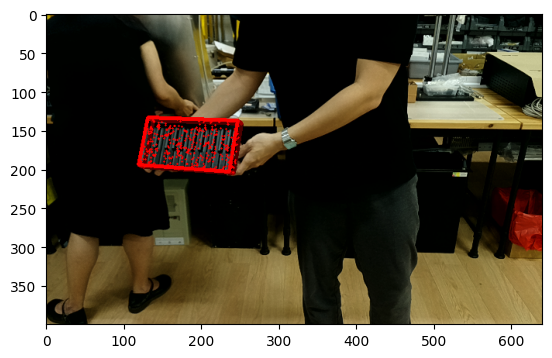

In [7]:
img = cv2.imread(img_path)[..., ::-1]

img = draw_detections(img, rot[None, ...], trans[None, ...], mesh, K[None, ...])

plt.imshow(img)

Cropped img

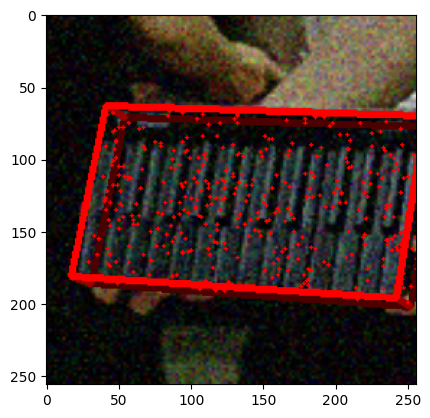

In [8]:
img = batch['img'][0].data[0].permute(1, 2, 0).to('cpu').numpy()
img = (img * 255).astype(np.uint8)  
rot = batch['annots']['gt_rotations'][0].data[0].to('cpu').numpy()
trans = batch['annots']['gt_translations'][0].data[0].to('cpu').numpy()
k = batch['annots']['k'][0].data[0].to('cpu').numpy()

img = draw_detections(img, rot[None, ...], trans[None, ...], mesh, k[None, ...])

plt.imshow(img)

# Check prediction

In [9]:
pred = model.loss(batch)

/home/giakhang/miniconda3/envs/scflow/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400410390/work/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [10]:
loss, log_imgs, log_vars, seq_rotations, seq_translations = pred

In [11]:
img = log_imgs['real_images']
img = (img * 255).astype(np.uint8)

pred_tran = seq_translations[-1][0].detach().to('cpu').numpy()
pred_rot = seq_rotations[-1][0].detach().to('cpu').numpy()
k = batch['annots']['k'][0].data[0].to('cpu').numpy()

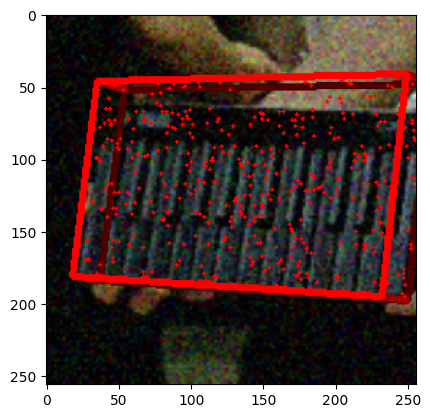

In [12]:
img = draw_detections(img, pred_rot[None, ...], pred_tran[None, ...], mesh, k[None, ...])

plt.imshow(img)

# Check test set

In [55]:
test_dataloader = Runner.build_dataloader(cfg.test_dataloader)

for _, test_batch in enumerate(test_dataloader):
    break

100%|██████████| 27/27 [00:00<00:00, 68717.36it/s]


Check annot full img

In [56]:
img_path = test_batch['img_metas'][0].data['img_path']
rot = test_batch['annots']['gt_rotations'][0].data[0].to('cpu').numpy()
trans = test_batch['annots']['gt_translations'][0].data[0].to('cpu').numpy()
K = test_batch['annots']['ori_k'][0].data.to('cpu').numpy()

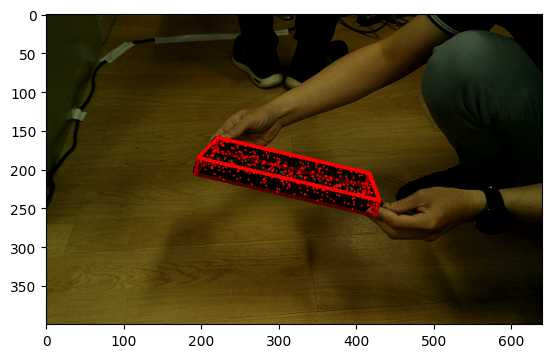

In [ ]:
img = cv2.imread(img_path)[..., ::-1]
img = draw_detections(img, rot[None, ...], trans[None, ...], mesh, K[None, ...])
plt.imshow(img)

Check cropped img

In [58]:
cropped_img = test_batch['img'][0].data[0].permute(1, 2, 0).to('cpu').numpy() 
cropped_img = (cropped_img * 255).astype(np.uint8)

trans_mat = test_batch['annots']['transform_matrix'][0].data[0].to('cpu').numpy()

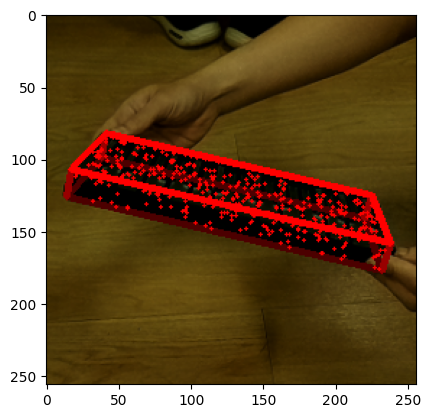

In [59]:
img = draw_detections(
    cropped_img, 
    rot[None, ...], 
    trans[None, ...], 
    mesh, 
    (trans_mat @ K)[None, ...]
)

plt.imshow(img)

## test prediction

In [60]:
pred = model(test_batch)

In [69]:
pred_rot = pred['rotations'][0].data.cpu().numpy()[0]
pred_tran = pred['translations'][0].data.cpu().numpy()[0]

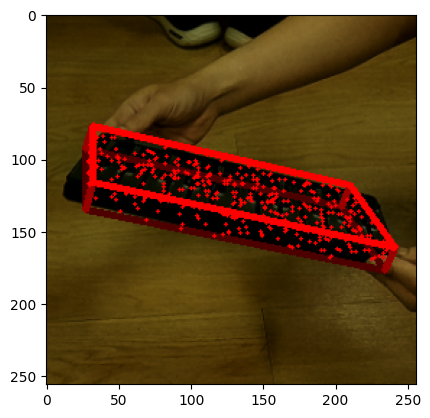

In [71]:
img = draw_detections(
    cropped_img, 
    pred_rot[None, ...], 
    pred_tran[None, ...], 
    mesh, 
    (trans_mat @ K)[None, ...]
)

plt.imshow(img)

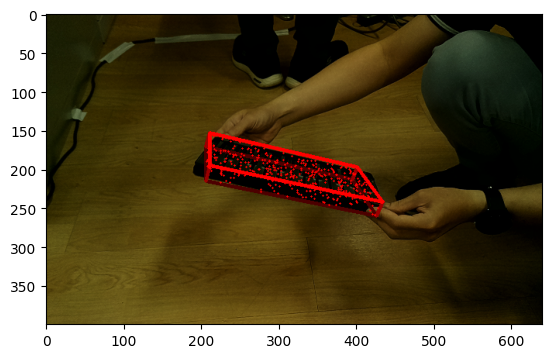

In [72]:
full_img =  cv2.imread(img_path)[..., ::-1]

img = draw_detections(
    full_img, 
    pred_rot[None, ...], 
    pred_tran[None, ...], 
    mesh, 
    K[None, ...]
)

plt.imshow(img)